In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import gridspec
import tensorflow as tf
import tensorflow_hub as tf_hub
import PIL

In [ ]:
def load_image(image_path, image_size = (512, 256)):
  img = tf.io.decode_image(tf.io.read_file(image_path), channels = 3, dtype = tf.float32)[tf.newaxis, ...]
  img = tf.image.resize(img, image_size, preserve_aspect_ratio = True)

  return img

In [ ]:
def visualize(images, titles = ('', )):
  noi = len(images)
  image_sizes = [image.shape[1] for image in images]
  w = (image_sizes[0] * 6) // 320
  plt.figure(figsize = (w  * noi, w))
  grid_look = gridspec.GridSpec(1, noi, width_ratios = image_sizes)
  
  for i in range(noi):
    plt.figure(figsize = (16, 10))
    plt.subplot(grid_look[i])
    plt.imshow(images[i][0], aspect = 'equal')
    plt.axis('off')
    plt.title(titles[i])
    plt.savefig('final.jpg')
  plt.show()

In [ ]:
original = load_image('/original_image 4.jpg')
style = load_image('/content/style_image.jpg')

<Figure size 288x144 with 0 Axes>

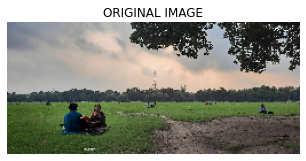

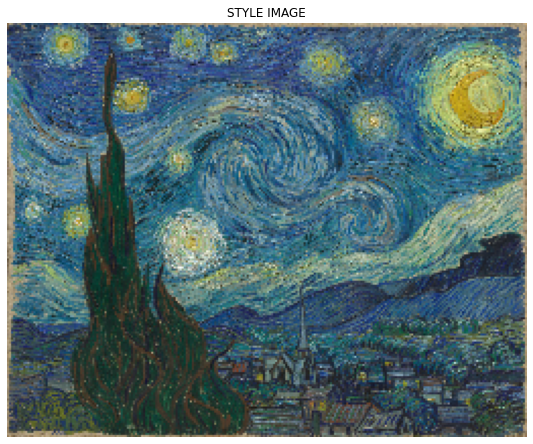

In [ ]:
visualize([original, style], ['ORIGINAL IMAGE', 'STYLE IMAGE'])

In [ ]:
style_image = tf.nn.avg_pool(style, ksize = [3, 3], strides = [1, 1], padding = 'VALID')

In [ ]:
stylized_model = tf_hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
results = stylized_model(tf.constant(original), tf.constant(style))

<Figure size 432x144 with 0 Axes>

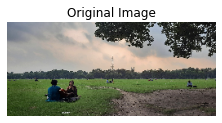

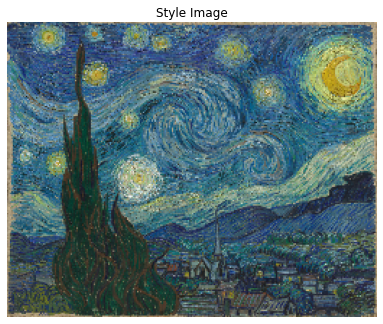

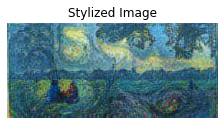

In [ ]:
stylized = results[0]
visualize([original, style, stylized], titles=['Original Image', 'Style Image', 'Stylized Image'])